Let's start by importing the essential libraries for handling eye tracker data. The EyeTrackingRun class is a tool for managing and processing eye-tracking data, encompassing key elements like samples, events, messages, and metadata such as session details, task names, and participant information. It allows you to convert your eye tracker data into BIDS-compatible files, generate JSON, and visualize the data.

In [1]:
%matplotlib inline
import pandas as pd
from pathlib import Path
from pyedfread import edf, edfread
from eyetrackingrun import EyeTrackingRun

In the schedule.tsv file, we've listed the EDF files we created and their associated sessions. Now, let's check out what's in the file.

In [2]:
edf_lookup = pd.read_csv("schedule.tsv", sep='\t', na_values="n/a")
edf_lookup

,session,day,PE,fixation_edf,qct_edf,rest_edf,bht_edf
0,1,2023-10-20,LR,fixation_2023-10-20_18h48.03.561_5_session_1.EDF,qct_2023-10-20_19h40.38.964_2_session_1.EDF,rest_2023-10-20_19h48.22.344_0_session_1.EDF,bht_2023-10-20_20h10.50.517_0_session_1.EDF
1,3,2023-10-21,LR,fixation_2023-10-21_09h26.29.983_3_session_3.EDF,qct_2023-10-21_10h04.32.961_0_session_3.EDF,rest_2023-10-21_10h11.23.092_0_session_3.EDF,bht_2023-10-21_10h33.23.269_0_session_3.EDF
2,4,2023-10-21,RL,fixation_2023-10-21_11h28.03.360_2_session_4.EDF,qct_2023-10-21_12h14.11.346_3_session_4.EDF,rest_2023-10-21_12h20.30.939_0_session_4.EDF,bht_2023-10-21_12h43.24.654_0_session_4.EDF
3,5,2023-10-22,PA,fixation_2023-10-22_09h46.25.719_2_session_5.EDF,qct_2023-10-22_10h25.10.141_0_session_5.EDF,rest_2023-10-22_10h32.38.153_0_session_5.EDF,bht_2023-10-22_10h55.36.134_0_session_5.EDF
4,6,2023-10-22,PA,fixation_2023-10-22_11h32.03.586_0_session_6.EDF,qct_2023-10-22_12h10.47.134_0_session_6.EDF,rest_2023-10-22_12h16.56.202_0_session_6.EDF,bht_2023-10-22_12h39.19.476_1_session_6.EDF
5,7,2023-10-23,LR,fixation_2023-10-23_19h47.56.955_3_session_7.EDF,qct_2023-10-23_20h25.20.999_0_session_7.EDF,rest_2023-10-23_20h31.49.334_0_session_7.EDF,bht_2023-10-23_20h54.11.318_1_session_7.EDF
6,8,2023-10-23,RL,fixation_2023-10-23_21h30.29.785_0_session_8.EDF,qct_2023-10-23_22h08.36.963_0_session_8.EDF,rest_2023-10-23_22h15.00.201_0_session_8.EDF,bht_2023-10-23_22h36.54.314_0_session_8.EDF
7,9,2023-10-24,AP,fixation_2023-10-24_19h39.27.478_3_session_9.EDF,qct_2023-10-24_20h15.40.693_0_session_9.EDF,rest_2023-10-24_20h24.27.482_0_session_9.EDF,bht_2023-10-24_20h46.08.308_0_session_9.EDF
8,10,2023-10-24,RL,fixation_2023-10-24_21h26.14.900_1_session_10.EDF,qct_2023-10-24_22h10.40.236_0_session_10.EDF,rest_2023-10-24_22h18.14.132_0_session_10.EDF,bht_2023-10-24_22h41.05.920_0_session_10.EDF
9,11,2023-10-25,AP,fixation_2023-10-25_20h37.34.053_7_session_11.EDF,qct_2023-10-25_21h12.18.840_0_session_11.EDF,rest_2023-10-25_21h23.26.254_0_session_11.EDF,bht_2023-10-25_21h47.06.131_1_session_11.EDF


As an illustrative example, we'll handle the data from session 4. Replace DATA_PATH with your data's path and BIDS_PATH with your BIDS-compatible folder path. The phase encoding direction value for this session can be extracted directly from the edflookup dataframe.

In [3]:
DATA_PATH = Path("/home/esavary/Projects/ET-data/")
BIDS_PATH = Path("/home/esavary/Projects/HCPH-BIDS_ET/output_newcode/")
participant = "001"
session = 4
et_session = edf_lookup[edf_lookup.session == session]
pe = et_session.PE.values[0]
screen_resolution=(800,600)

# dwi

Let's begin with the dwi data. Using the _pyedfread_ library, we extract samples, revealing the participant's eye movements over time. Additionally, we capture event information for fixations and saccades, referred to as events, and messages containing metadata for each trial.

In [5]:
samples, events, messages = edf.pread(str(DATA_PATH / et_session.fixation_edf.values[0]), trial_marker=b"")

Let's encapsulate the data, including session information, into an EyeTrackingRun object. The `message_first_trigger` corresponds to the message sent to the eye tracker during the task, synchronized with the initial trigger from the MRI. This synchronization ensures alignment between eye-tracking data and other modalities, and the `message_first_trigger` is defined in the _Psychopy_ tasks.

In [6]:
DwiSession4 = EyeTrackingRun(
    session=int(session),
    task_name='dwi',
    participant=int(participant),
    samples=samples,
    events=events,
    messages=messages,
    message_first_trigger='hello',
    screen_resolution=screen_resolution,
    pe=pe
)

Now, as an illustration, let's plot the participant's pupil size during the dwi run. The gaps in the plot directly correlate to moments when the participant closed their eyes.

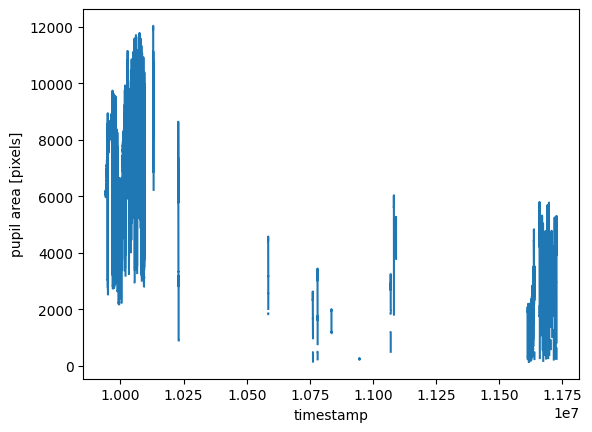

In [7]:
DwiSession4.plot_pupil_size()

We can also visualize the duration of blinks (the gaps observed in the previous plot) during the entire run.

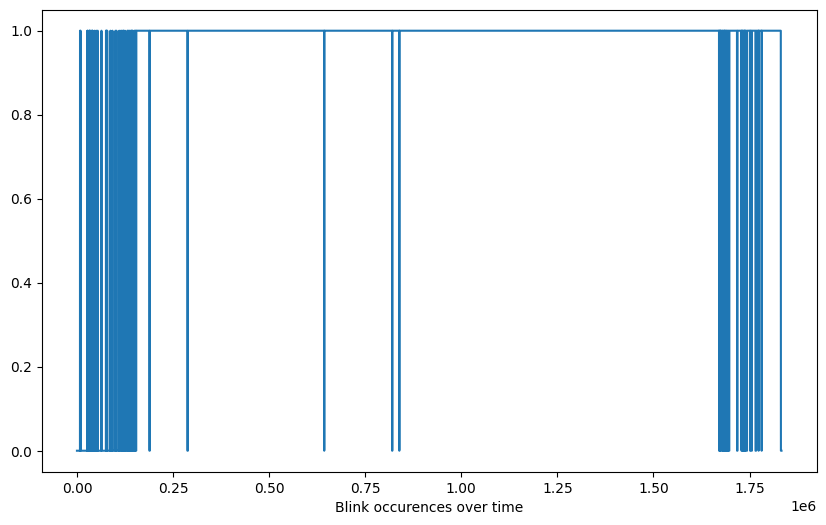

In [8]:
DwiSession4.plot_delta()

Now, let's examine the participant's gaze coordinates over time. The upper plot represents the x-coordinates, while the lower plot displays the y-coordinates.

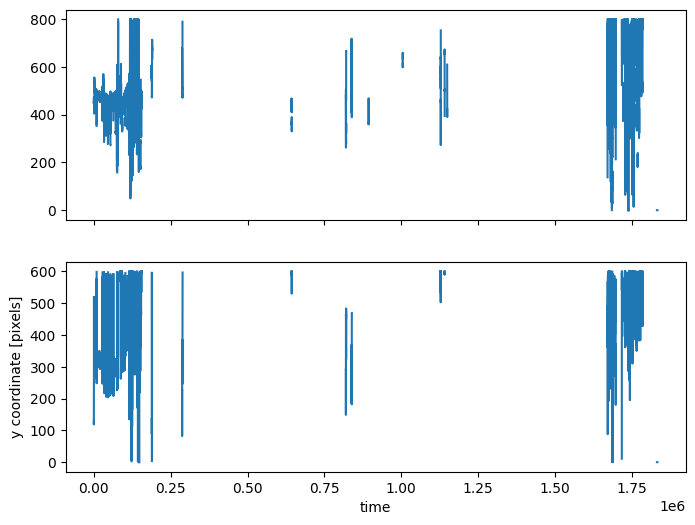

In [9]:
DwiSession4.plot_coordinates_ts()

Another way to visualize the gaze coordinates over time is through a heatmap, illustrating the distribution of the participant's gaze on the screen. Hotter colors indicate areas where the participant spent more time looking.

In [ ]:
DwiSession4.plot_heatmap_coordinate_density()

Now, let's save the samples into a compressed TSV file. To achieve this, you can utilize the provided function. The include_events argument adds three additional columns in the samples, indicating the time location of fixations, saccades, and blinks.

In [ ]:
column_names = DwiSession4.save_and_process_samples(BIDS_PATH,include_events=True)

Now, we'll save the metadata as a JSON file within the BIDS dataset.

In [ ]:
DwiSession4.create_info_json(BIDS_PATH,"info_ET.json")

# qct

Now, let's repeat the process for the quality control task. We'll encapsulate the session data and showcase the same visualizations.

In [ ]:
samples, events, messages = edf.pread(str(DATA_PATH / et_session.qct_edf.values[0]), trial_marker=b"")
QctSession4 = EyeTrackingRun(
    session=int(session),
    task_name='qct',
    participant=int(participant),
    samples=samples,
    events=events,
    messages=messages,
    message_first_trigger='hello',
    screen_resolution=screen_resolution,
    pe=pe
)

In [ ]:
QctSession4.plot_pupil_size()

In [ ]:
QctSession4.plot_delta()

In [ ]:
QctSession4.plot_coordinates_ts()

In [ ]:
QctSession4.plot_heatmap_coordinate_density()

And now, we save both the data and the corresponding JSON file.

In [ ]:
QctSession4.save_and_process_samples(BIDS_PATH,include_events=True)

In [ ]:
QctSession4.create_info_json(BIDS_PATH,"info_ET.json")

# rest

Similarly, we'll visualize and process the data from the resting state.

In [ ]:
samples, events, messages = edf.pread(str(DATA_PATH / et_session.rest_edf.values[0]), trial_marker=b"")
RestSession4 = EyeTrackingRun(
    session=int(session),
    task_name='rest',
    participant=int(participant),
    samples=samples,
    events=events,
    messages=messages,
    message_first_trigger='start movie',
    screen_resolution=screen_resolution,
    pe=pe
)

In [ ]:
RestSession4.plot_pupil_size()

In [ ]:
RestSession4.plot_delta()

In [ ]:
RestSession4.plot_coordinates_ts()

The upcoming plot might take some time due to the substantial data size in the resting state. For a quicker overview, you can run the next cell, which provides a 2D histogram instead of the density plot.

In [ ]:
RestSession4.plot_heatmap_coordinate_density()

In [ ]:
RestSession4.plot_heatmap_coordinate_histo()

Let's save both the data and metadata.

In [ ]:
RestSession4.save_and_process_samples(BIDS_PATH,include_events=True)

In [ ]:
RestSession4.create_info_json(BIDS_PATH,"info_ET.json")

# bht

Lastly, let's handle the data from the breath-holding task.

In [ ]:
samples, events, messages = edf.pread(str(DATA_PATH / et_session.bht_edf.values[0]), trial_marker=b"")
BhtSession4 = EyeTrackingRun(
    session=int(session),
    task_name='bht',
    participant=int(participant),
    samples=samples,
    events=events,
    messages=messages,
    message_first_trigger='Hello',
    screen_resolution=screen_resolution,
    pe=pe
)

In [ ]:
BhtSession4.plot_pupil_size()

In [ ]:
BhtSession4.plot_delta()

In [ ]:
BhtSession4.plot_coordinates_ts()

In [ ]:
BhtSession4.plot_heatmap_coordinate_density()

Let's save both the data and metadata.

In [ ]:
BhtSession4.save_and_process_samples(BIDS_PATH,include_events=True)

In [ ]:
BhtSession4.create_info_json(BIDS_PATH,"info_ET.json")